<a href="https://colab.research.google.com/github/VFdo/FYRP/blob/main/model_testing/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.5625
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.75      0.75      0.75         4
           2       0.29      0.67      0.40         3
           3       1.00      0.40      0.57         5

    accuracy                           0.56        16
   macro avg       0.68      0.58      0.57        16
weighted avg       0.72      0.56      0.58        16



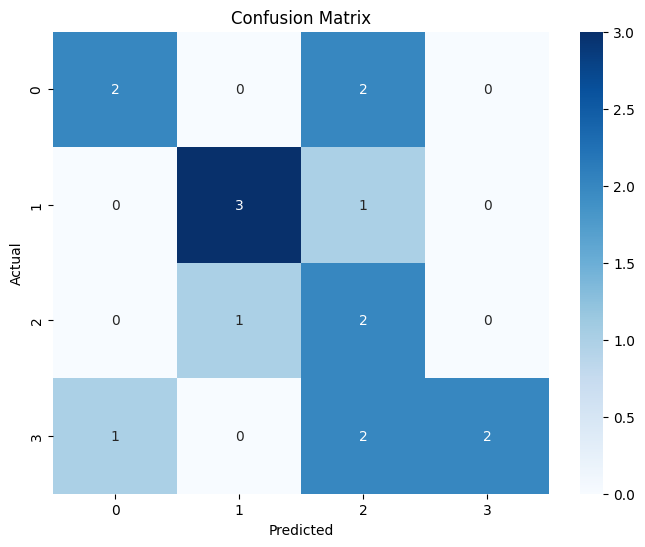

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Upload the CSV file
filepath = '/content/data.csv'

# Step 2: Load the data into a DataFrame
df = pd.read_csv(filepath)

# Step 3: Split the data into features and labels
X = df['code'] #.values.reshape(-1, 1)  # Assuming 'data_value' is numeric
y = df['label']

# Step 4: Vectorize the text data
vectorizer = CountVectorizer() # Initialize CountVectorizer
X = vectorizer.fit_transform(X) # Transform text to numerical feature vectors

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Initialize the Naive Bayes model
model = MultinomialNB()


# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 11: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optional: Predict on new data
# new_data = [[value]]  # Replace 'value' with new data to predict
# prediction = model.predict(new_data)
# print("Predicted class:", prediction)


Cross-Validation Scores: [0.69230769 0.69230769 0.61538462 0.75      ]
Mean CV Accuracy: 0.6875
Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.80      0.67      0.73         6
           2       0.44      0.80      0.57         5
           3       1.00      0.75      0.86         4

    accuracy                           0.67        21
   macro avg       0.75      0.68      0.69        21
weighted avg       0.74      0.67      0.68        21



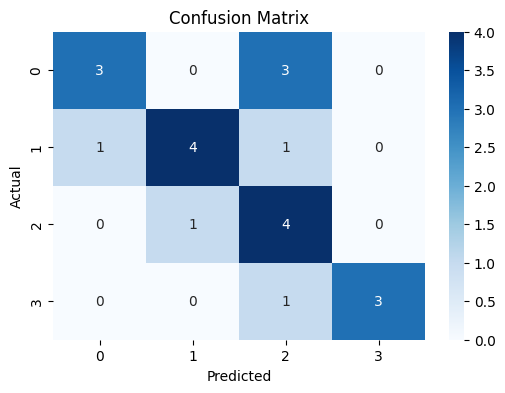

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Upload the CSV file
filepath = '/content/data.csv'

# Step 2: Load the data into a DataFrame
df = pd.read_csv(filepath)

# Step 3: Split the data into features and labels
X = df['code']
y = df['label']

# Step 4: Vectorize the text data
vectorizer = CountVectorizer() # Initialize CountVectorizer
X = vectorizer.fit_transform(X) # Transform text to numerical feature vectors

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

# Step 5: Initialize the Naive Bayes model
model = MultinomialNB()

# Step 5: Perform cross-validation using KFold
# Create a KFold object with shuffling
kf = KFold(n_splits=4, shuffle=True, random_state=2)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf) # Use KFold object for cross-validation

# Step 6: Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 11: Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optional: Predict on new data
# new_data = [[value]]  # Replace 'value' with new data to predict
# prediction = model.predict(new_data)
# print("Predicted class:", prediction)
